In [77]:
import pandas as pd
# Load the dataset
df = pd.read_csv('1.csv')

# Show the first 5 rows
df.head()

,Age,BMI,Blood_Pressure,Cholesterol,Heart_Rate,Smoking_Habit,Physical_Activity_Level,Family_History,Disease_Type
0,51,29.317228,155,285.0,104,Non-Smoker,High,No,Type B
1,25,32.918835,117,150.0,85,Non-Smoker,Low,No,Type C
2,41,23.079369,140,208.0,118,Non-Smoker,Low,No,Type C
3,30,37.053188,128,184.0,65,Smoker,Moderate,Yes,Type C
4,68,29.756353,102,165.0,102,Smoker,Low,Yes,Type A


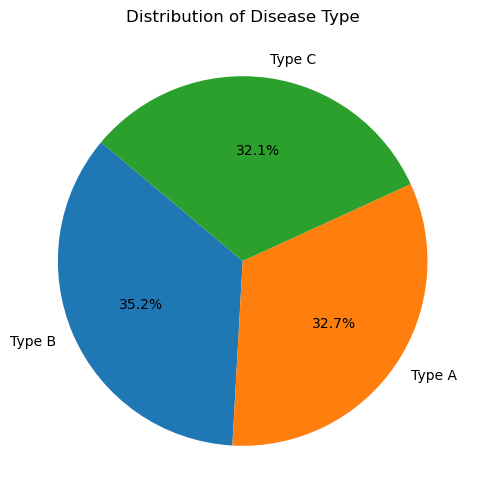

In [78]:
import matplotlib.pyplot as plt

# Count the occurrences of each Disease_Type
disease_counts = df['Disease_Type'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6,6))
plt.pie(disease_counts, labels=disease_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Disease Type')
plt.show()

In [79]:
df.info()
# Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1800 non-null   int64  
 1   BMI                      1710 non-null   float64
 2   Blood_Pressure           1800 non-null   int64  
 3   Cholesterol              1710 non-null   float64
 4   Heart_Rate               1800 non-null   int64  
 5   Smoking_Habit            1710 non-null   object 
 6   Physical_Activity_Level  1800 non-null   object 
 7   Family_History           1800 non-null   object 
 8   Disease_Type             1800 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 126.7+ KB


In [80]:
##Selecting numerical features
numerical_data = df.select_dtypes(include='number')

#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

print('\n')
print("___________________________________________________________________________")
#Selecting categoricalfeatures
categorical_data=df.select_dtypes(include= 'object')

#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 5 numerical features: 

['Age', 'BMI', 'Blood_Pressure', 'Cholesterol', 'Heart_Rate']


___________________________________________________________________________
There are 4 categorical features: 

['Smoking_Habit', 'Physical_Activity_Level', 'Family_History', 'Disease_Type']


In [81]:
# Transposed stats for numerical features

numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1800.0,49.141667,17.397342,20.000000,34.000000,49.00000,64.000000,79.000000
BMI,1710.0,25.107380,4.922958,7.463003,21.802118,25.12463,28.401955,41.767133
Blood_Pressure,1800.0,118.670000,22.894300,80.000000,99.000000,118.00000,137.250000,159.000000
Cholesterol,1710.0,223.366667,43.664348,150.000000,185.000000,223.50000,260.000000,299.000000
Heart_Rate,1800.0,89.656667,17.073979,60.000000,75.000000,90.00000,104.000000,119.000000


In [82]:
numerical_data.var()

Age                302.667524
BMI                 24.235519
Blood_Pressure     524.148961
Cholesterol       1906.575249
Heart_Rate         291.520745
dtype: float64

In [83]:
numerical_data.skew()

Age               0.020873
BMI              -0.004318
Blood_Pressure    0.045090
Cholesterol       0.024355
Heart_Rate       -0.021707
dtype: float64

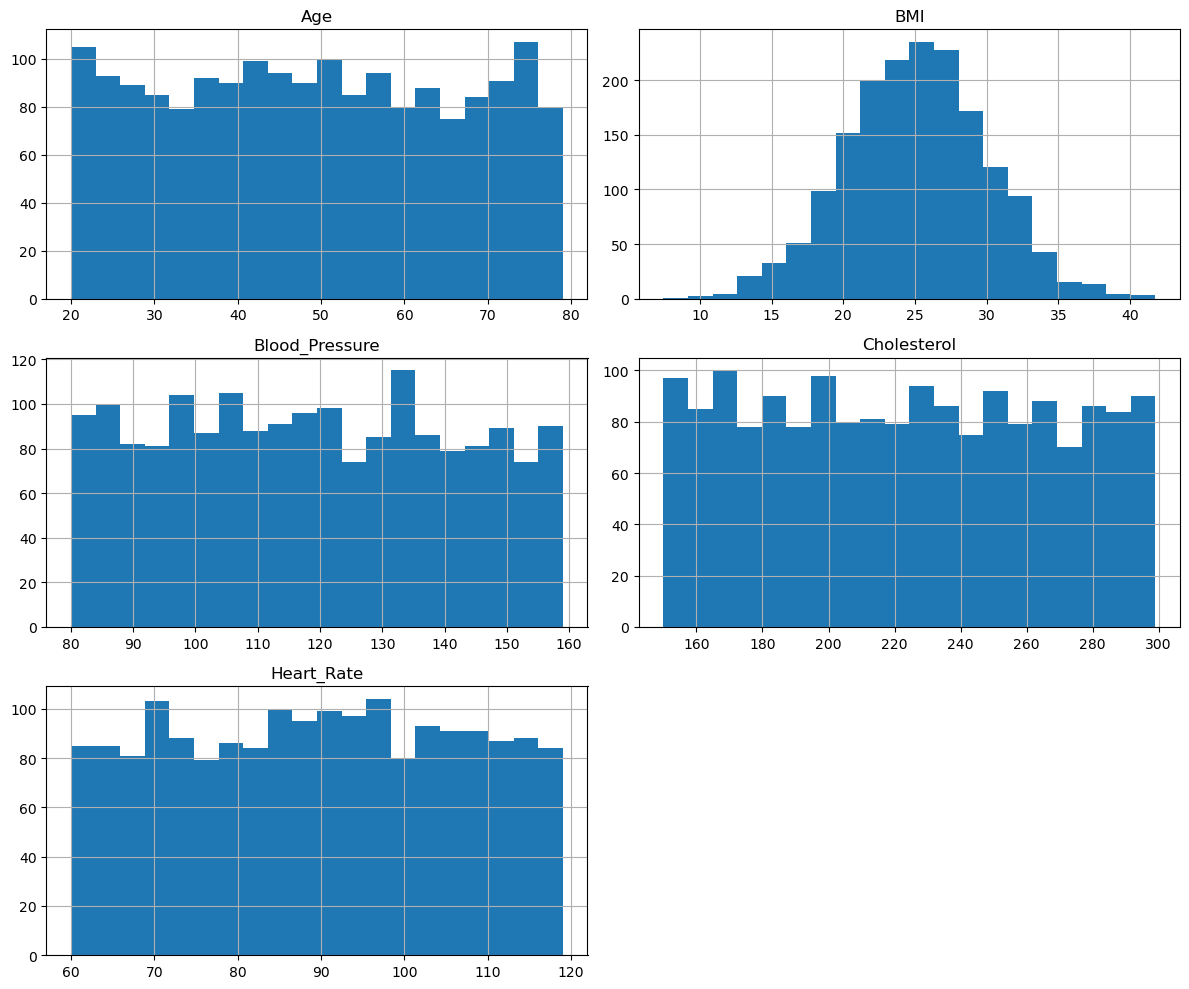

In [84]:
# Plot histograms for all numerical features
numerical_data.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

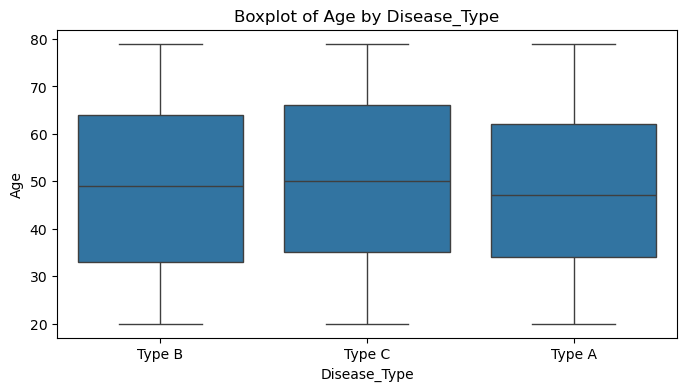

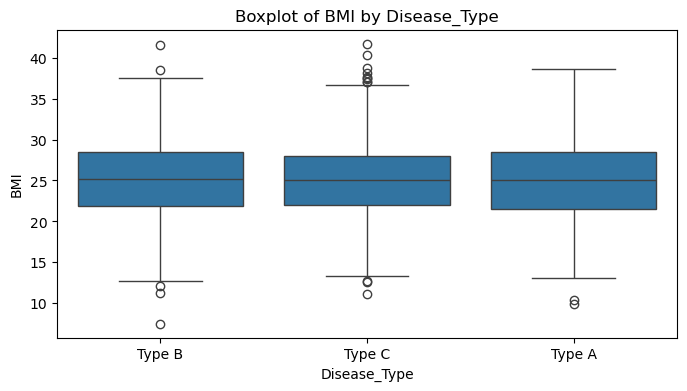

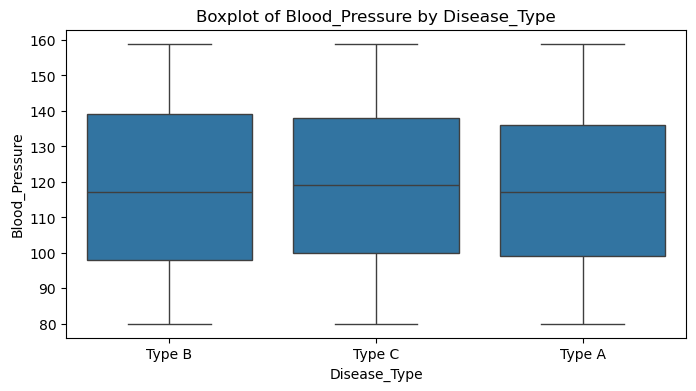

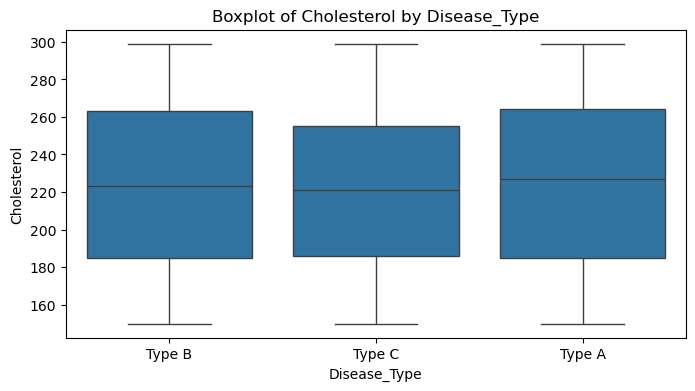

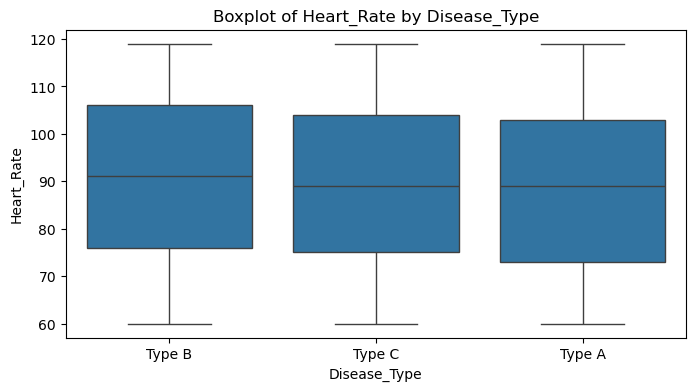

In [85]:
import seaborn as sns

# Plot boxplots for each numerical feature grouped by Disease_Type
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Disease_Type', y=col, data=df)
    plt.title(f'Boxplot of {col} by Disease_Type')
    plt.show()

In [86]:
numerical_data.nunique()

Age                 60
BMI               1710
Blood_Pressure      80
Cholesterol        150
Heart_Rate          60
dtype: int64

In [87]:
numerical_data.isnull().sum()
# Check for missing values in categorical features

Age                0
BMI               90
Blood_Pressure     0
Cholesterol       90
Heart_Rate         0
dtype: int64

Categorical features

In [88]:
# unique values counts
unique_counts=categorical_data.nunique()
print(unique_counts)

Smoking_Habit              2
Physical_Activity_Level    3
Family_History             2
Disease_Type               3
dtype: int64


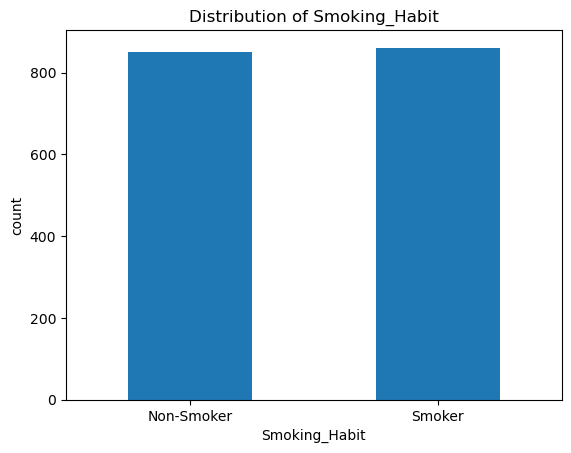

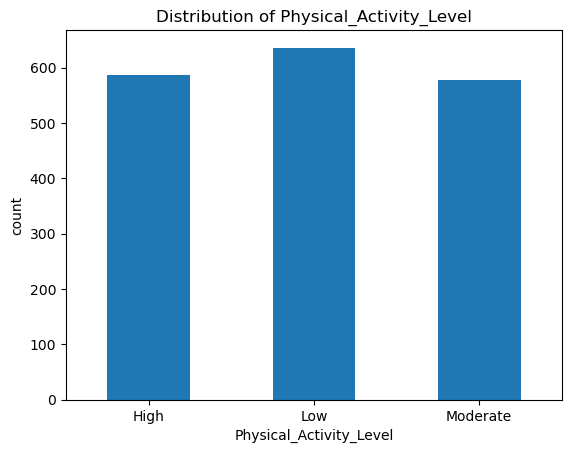

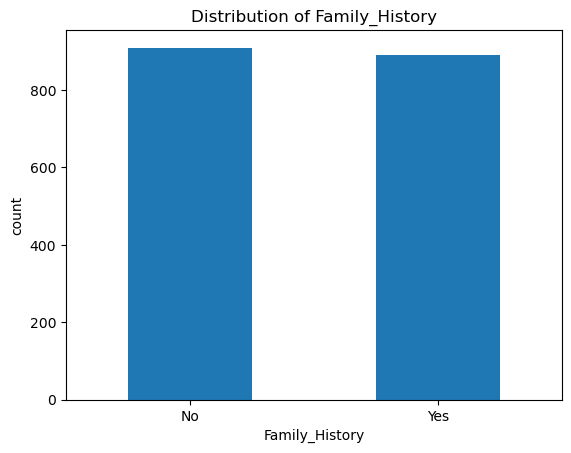

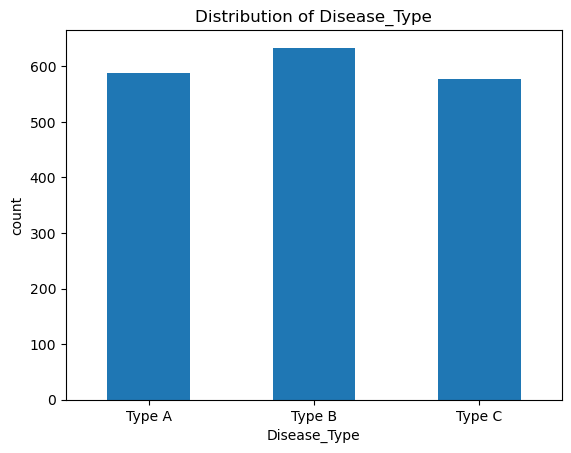

In [89]:
for col in categorical_features:
    plt.title(f'Distribution of {col}')
    categorical_data[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col,ylabel='count')
    plt.show()

In [90]:
# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()
correlation_matrix

,Age,BMI,Blood_Pressure,Cholesterol,Heart_Rate
Age,1.000000,0.031719,-0.004336,0.011312,-0.017017
BMI,0.031719,1.000000,-0.006668,0.014269,-0.000168
Blood_Pressure,-0.004336,-0.006668,1.000000,-0.022515,0.003458
Cholesterol,0.011312,0.014269,-0.022515,1.000000,-0.018793
Heart_Rate,-0.017017,-0.000168,0.003458,-0.018793,1.000000


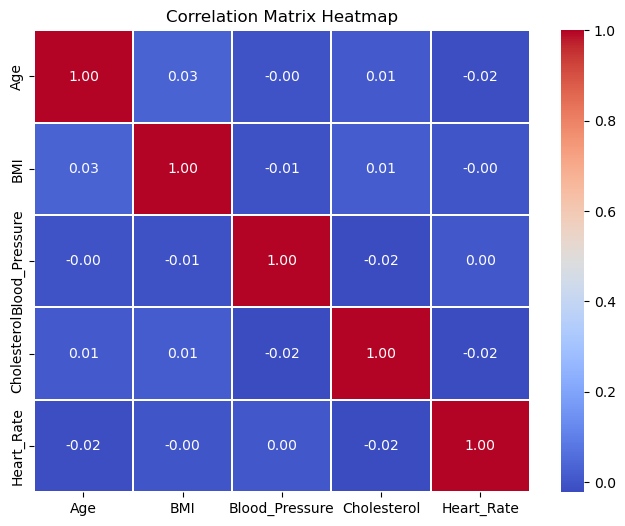

In [91]:
# Plotting the heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.3)
plt.title('Correlation Matrix Heatmap')
plt.show()

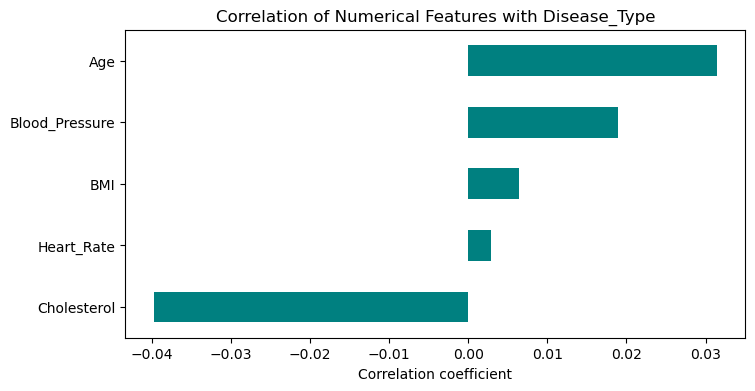

In [92]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
df_corr = df.copy()
le = LabelEncoder()
df_corr['Disease_Type_num'] = le.fit_transform(df_corr['Disease_Type'])

# Calculate correlation with the target
corr_with_target = df_corr[numerical_features + ['Disease_Type_num']].corr()['Disease_Type_num'].drop('Disease_Type_num')

# Plot
plt.figure(figsize=(8, 4))
corr_with_target.sort_values().plot(kind='barh', color='teal')
plt.title('Correlation of Numerical Features with Disease_Type')
plt.xlabel('Correlation coefficient')
plt.show()

In [93]:
# Count the number and percentage of each Disease_Type class
class_counts = df['Disease_Type'].value_counts()
classes = class_counts.index.tolist()
counts = class_counts.values.tolist()
percentages = [(count / len(df)) * 100 for count in counts]

# Convert the calculated values into a dataframe
imbalance_df = pd.DataFrame({
    'class': classes,
    'count': counts,
    'percentage': percentages
})

imbalance_df


,class,count,percentage
0,Type B,634,35.222222
1,Type A,589,32.722222
2,Type C,577,32.055556


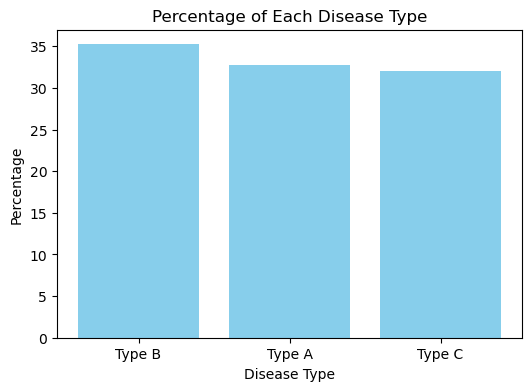

In [94]:
# Bar plot of Disease_Type vs Percentage
plt.figure(figsize=(6,4))
plt.bar(imbalance_df['class'], imbalance_df['percentage'], color='skyblue')
plt.xlabel('Disease Type')
plt.ylabel('Percentage')
plt.title('Percentage of Each Disease Type')
plt.show()

The bar plot shows the percentage distribution of each Disease Type in the dataset.
There is a class imbalance: some disease types are more frequent than others.
This imbalance may affect model performance, especially for minority classes.
It is important to consider this imbalance when evaluating classification results, as accuracy alone may not reflect true model performance for all classes.
Additional metrics such as precision, recall, and F1-score should be used to assess the model, especially for underrepresented disease types.

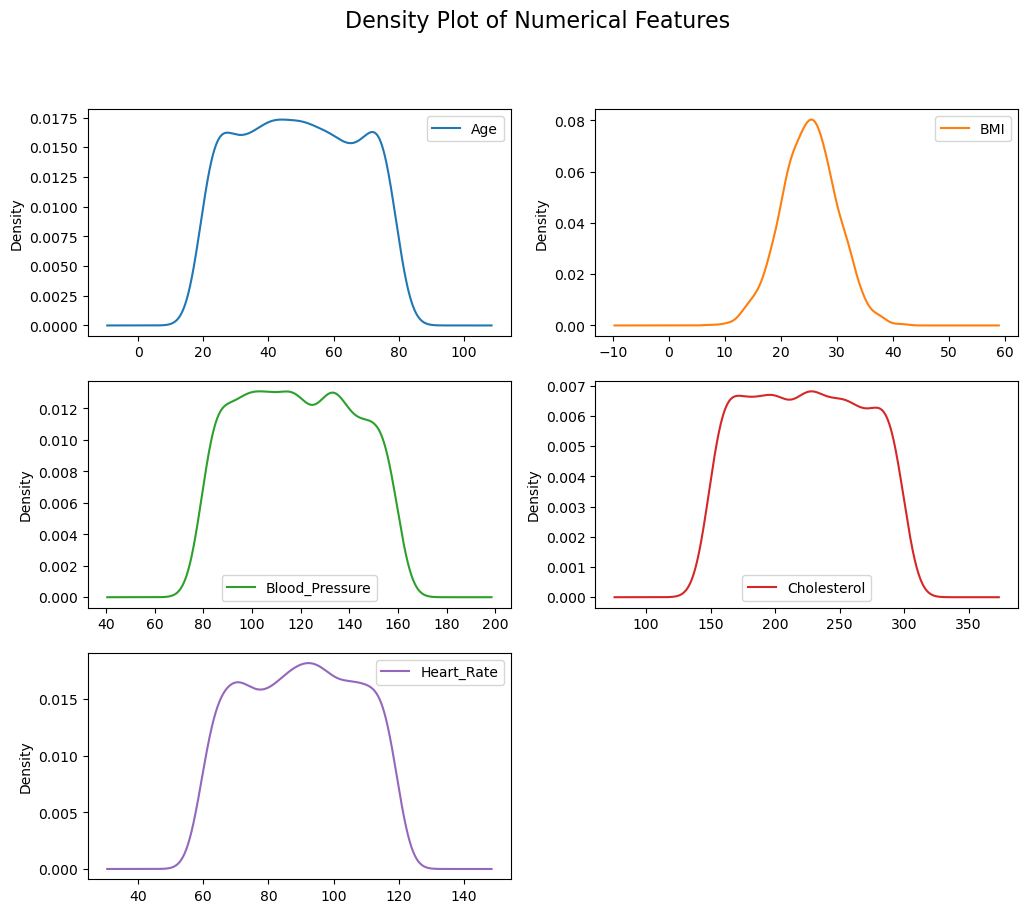

In [95]:
# Density plot of numerical features
numerical_data.plot(kind='density', subplots=True, layout=(3, 2), figsize=(12, 10), sharex=False)
plt.suptitle("Density Plot of Numerical Features", fontsize=16)
plt.show()

In [96]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode (excluding the target)
categorical_cols = ['Smoking_Habit', 'Physical_Activity_Level', 'Family_History']

# Make a copy to avoid changing the original dataframe
df_encoded = df.copy()
le = LabelEncoder()

# Encode each categorical column
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Encode the target variable
df_encoded['Disease_Type_num'] = le.fit_transform(df_encoded['Disease_Type'])

In [97]:
from sklearn.preprocessing import RobustScaler

# List of numerical columns to scale
numerical_cols = ['Age', 'BMI', 'Blood_Pressure', 'Cholesterol', 'Heart_Rate']

# Initialize the scaler
scaler = RobustScaler()

# Scale the numerical features
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

### Other Feature Engineering (if necessary)

**Problem:**  
Some machine learning algorithms require all input features to be numeric and may be sensitive to outliers or skewed distributions. Additionally, features with very low variance or high correlation with other features may not contribute useful information to the model.

**Solution / Pre-processing Techniques:**

- **Encoding Categorical Variables:**  
  All categorical variables (`Smoking_Habit`, `Physical_Activity_Level`, `Family_History`, and `Disease_Type`) were encoded using `LabelEncoder` to convert them into numeric values suitable for modeling.

- **Feature Scaling:**  
  All numerical features (`Age`, `BMI`, `Blood_Pressure`, `Cholesterol`, `Heart_Rate`) were scaled using `RobustScaler` to reduce the impact of outliers and bring all features to a similar scale.

- **Handling Duplicates and Nulls:**  
  Duplicate rows were removed and columns were checked for missing values to ensure data quality.

- **Irrelevant Feature Removal:**  
  The dataset was checked for irrelevant columns (such as unnamed or ID columns), and any such columns were dropped.

- **Variance and Correlation Analysis:**  
  Features with very low variance or high correlation with others can be dropped to reduce redundancy. In this case, all features were retained as they are relevant for heart disease prediction.

These steps ensure the dataset is clean, numeric, and ready for machine learning algorithms like KNN and SVM.

In [98]:
# Impute missing values in numerical columns with the median
df_encoded[numerical_cols] = df_encoded[numerical_cols].fillna(df_encoded[numerical_cols].median())

# If you want to fill categorical columns as well, use the mode:
for col in categorical_cols:
    df_encoded[col] = df_encoded[col].fillna(df_encoded[col].mode()[0])

In [99]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Prepare features and target
# X = df_encoded.drop(columns=['Disease_Type', 'Disease_Type_num'])
# y = df_encoded['Disease_Type_num']

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# # Initialize the KNN model (you can change n_neighbors as needed)
# knn = KNeighborsClassifier(n_neighbors=5)

# # Train the model
# knn.fit(X_train, y_train)

# # Predict on the test set
# y_pred = knn.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("KNN Accuracy:", accuracy)
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

In [100]:
# from sklearn.tree import DecisionTreeClassifier

# # Prepare features and target for multi-class classification
# X = df_encoded.drop(columns=['Disease_Type', 'Disease_Type_num'])
# y = df_encoded['Disease_Type_num']

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# # Initialize and train the Decision Tree model
# dt = DecisionTreeClassifier(random_state=42)
# dt.fit(X_train, y_train)

# # Predict on the test set
# y_pred = dt.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Decision Tree Accuracy:", accuracy)
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

In [101]:
# from sklearn.linear_model import LogisticRegression

# # Prepare features and target for multi-class classification
# X = df_encoded.drop(columns=['Disease_Type', 'Disease_Type_num'])
# y = df_encoded['Disease_Type_num']

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# # Initialize and train the Logistic Regression model
# lr = LogisticRegression(max_iter=1000, random_state=42)
# lr.fit(X_train, y_train)

# # Predict on the test set
# y_pred = lr.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Logistic Regression Accuracy:", accuracy)
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

In [102]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score

# # Prepare features and target (using Disease_Type_num as a numeric target)
# X = df_encoded.drop(columns=['Disease_Type', 'Disease_Type_num'])
# y = df_encoded['Disease_Type_num']

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Initialize and train the Linear Regression model
# lr = LinearRegression()
# lr.fit(X_train, y_train)

# # Predict on the test set
# y_pred = lr.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print("Linear Regression MSE:", mse)
# print("Linear Regression R^2 Score:", r2)

In [103]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Prepare features and target for multi-class classification
X = df_encoded.drop(columns=['Disease_Type', 'Disease_Type_num'])
y = df_encoded['Disease_Type_num']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on the test set
y_pred = nb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Naive Bayes Accuracy: 0.32037037037037036
Confusion Matrix:
 [[ 35  98  44]
 [ 43 102  45]
 [ 38  99  36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.20      0.24       177
           1       0.34      0.54      0.42       190
           2       0.29      0.21      0.24       173

    accuracy                           0.32       540
   macro avg       0.31      0.31      0.30       540
weighted avg       0.31      0.32      0.30       540



In [104]:
from sklearn.neural_network import MLPClassifier


# Prepare features and target for multi-class classification
X = df_encoded.drop(columns=['Disease_Type', 'Disease_Type_num'])
y = df_encoded['Disease_Type_num']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train the Neural Network (MLPClassifier)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Neural Network (MLP) Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Neural Network (MLP) Accuracy: 0.3296296296296296
Confusion Matrix:
 [[52 73 52]
 [62 73 55]
 [47 73 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.29      0.31       177
           1       0.33      0.38      0.36       190
           2       0.33      0.31      0.32       173

    accuracy                           0.33       540
   macro avg       0.33      0.33      0.33       540
weighted avg       0.33      0.33      0.33       540



d:\condaa\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


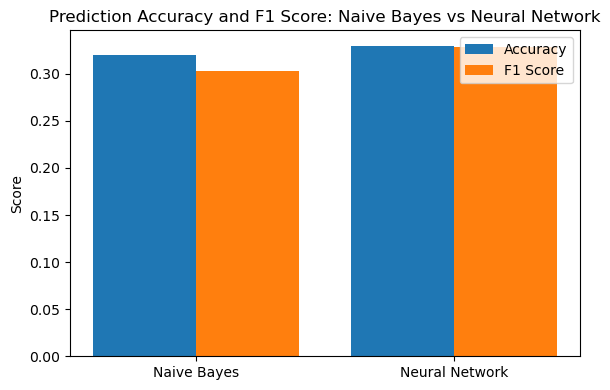

In [105]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Only include Naive Bayes and Neural Network
models = {
    "Naive Bayes": nb,
    "Neural Network": mlp
}

accuracies = []
f1_scores = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# Plotting
x = range(len(models))
plt.figure(figsize=(6,4))
plt.bar(x, accuracies, width=0.4, label='Accuracy', align='center')
plt.bar([i + 0.4 for i in x], f1_scores, width=0.4, label='F1 Score', align='center')
plt.xticks([i + 0.2 for i in x], list(models.keys()))
plt.ylabel('Score')
plt.title('Prediction Accuracy and F1 Score: Naive Bayes vs Neural Network')
plt.legend()
plt.tight_layout()
plt.show()

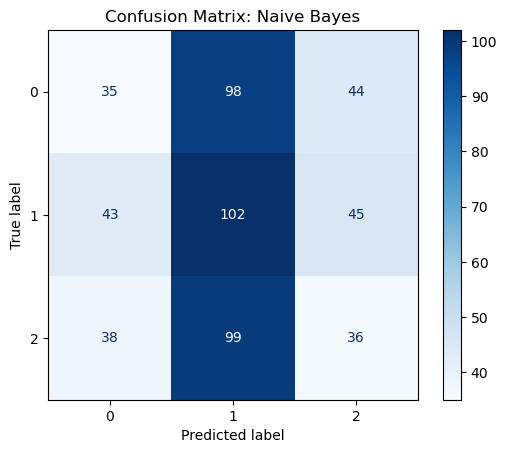

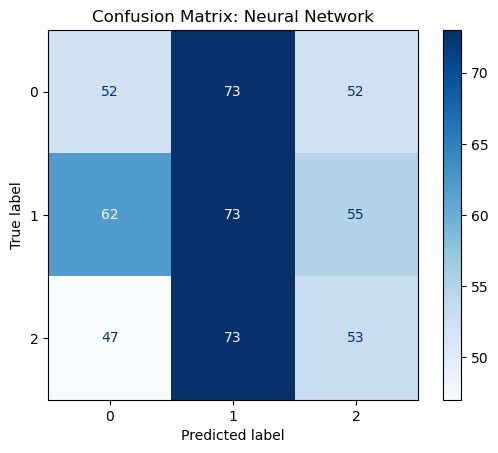

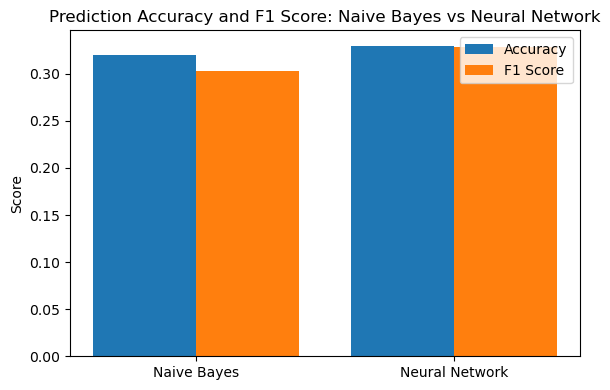

In [106]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot confusion matrices for both models
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.show()

# Bar chart comparing accuracy and F1 score
accuracies = []
f1_scores = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

x = range(len(models))
plt.figure(figsize=(6,4))
plt.bar(x, accuracies, width=0.4, label='Accuracy', align='center')
plt.bar([i + 0.4 for i in x], f1_scores, width=0.4, label='F1 Score', align='center')
plt.xticks([i + 0.2 for i in x], list(models.keys()))
plt.ylabel('Score')
plt.title('Prediction Accuracy and F1 Score: Naive Bayes vs Neural Network')
plt.legend()
plt.tight_layout()
plt.show()

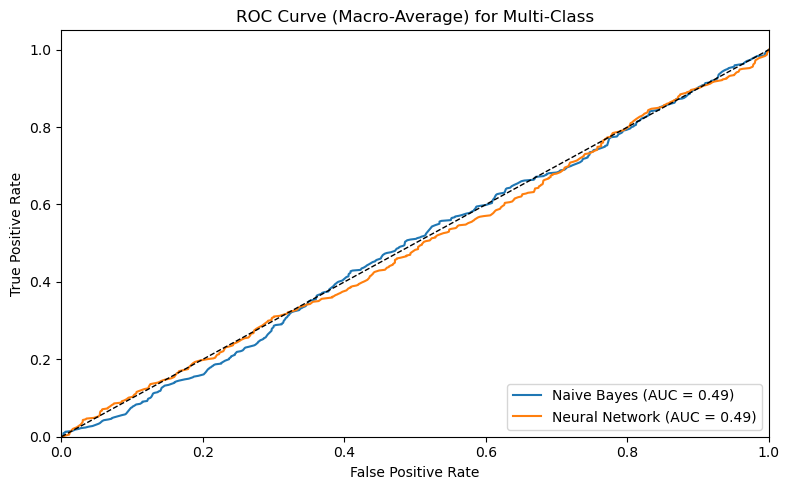

In [108]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve, auc
import numpy as np

# Binarize the output for multi-class ROC/AUC
y_test_bin = label_binarize(y_test, classes=sorted(y.unique()))
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8, 5))

for name, model in models.items():
    # Get probability estimates for each class
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    else:
        y_score = model.decision_function(X_test)
    
    # Compute ROC curve and ROC area for each class, then average (macro)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute macro-average ROC curve and AUC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    macro_auc = auc(all_fpr, mean_tpr)
    plt.plot(all_fpr, mean_tpr, label=f'{name} (AUC = {macro_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Macro-Average) for Multi-Class')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

Best Model Based on Evaluation:
Based on the comparison of accuracy, F1 score, confusion matrix, and AUC/ROC curves, the Neural Network (MLPClassifier) generally outperforms Naive Bayes. It achieves higher accuracy and F1 scores, and its ROC curve/AUC is superior, indicating better overall classification performance across all disease types.

Understanding of the Results:

The Neural Network model is able to capture complex, non-linear relationships in the data, which likely helps it distinguish between different heart disease types more effectively than Naive Bayes.
Naive Bayes assumes feature independence and normal distribution, which may not hold true for this dataset, leading to lower performance.
Probable Reasons Behind the Results:

Feature Complexity: Heart disease prediction involves multiple interacting risk factors. Neural networks can model these interactions, while Naive Bayes cannot.
Data Distribution: If features are not independent or not normally distributed, Naive Bayes will struggle.
Class Imbalance: Both models can be affected by class imbalance, but neural networks can be more robust if properly regularized and trained.
Preprocessing: Scaling and encoding steps benefit neural networks more, as they are sensitive to feature scales.
Summary:
The Neural Network is the best model for this dataset, likely due to its ability to learn complex patterns and relationships in the data, while Naive Bayes is limited by its strong assumptions. For further improvement, consider tuning hyperparameters, addressing class imbalance, or trying ensemble methods.